# The Sparks Foundation 
# Data Science & Business Analytics 
### Task 3 :  Exploratory Data Analysis - Retail
Perform ‘Exploratory Data Analysis’ on dataset  ‘SampleSuperstore’ 


As a business manager, try to find out the weak areas where you can work to make more profit.


What all business problems you can derive by exploring the  data?
### Name : Isaiyamudhu M


In [34]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data set

In [35]:
store_df = pd.read_csv('SampleSuperstore.csv')

In [36]:
store_df.head() #Top 5 rows of the dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [37]:
store_df.tail() #Last 5 rows of the dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# Basic Data Exploration

In [38]:
store_df.shape

(9994, 13)

In [39]:
store_df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [113]:
store_df.columns 

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [41]:
store_df.isnull().sum() #Checking null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [42]:
store_df.describe().T #displaying statistical summary for all numerical columns

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


# Handling missing value

In [43]:
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Handling Duplicate records

In [44]:
store_df.duplicated().sum()

17

In [45]:
store_df = store_df.drop_duplicates()
store_df.shape

(9977, 13)

In [46]:
store_df.duplicated().sum()

0

In [47]:
#Deleting the Postal code Variable.
col=['Postal Code']
store_df=store_df.drop(columns=col,axis=1)

# Correlation & Covarience

In [48]:
#Correlation Between Variables.
store_df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


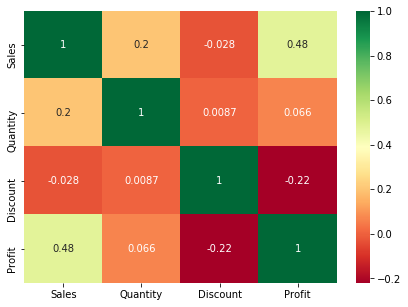

In [49]:
plt.figure(figsize=(7,5))
corr = store_df.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn');

In [50]:
# Covariance of columns
store_df.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


#### Ship Mode

In [51]:
store_df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

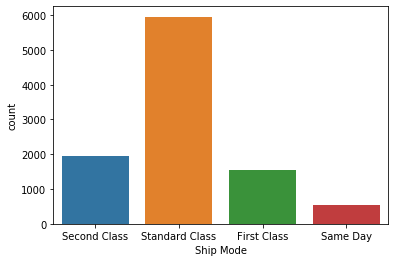

In [52]:
sns.countplot(x=store_df['Ship Mode'])

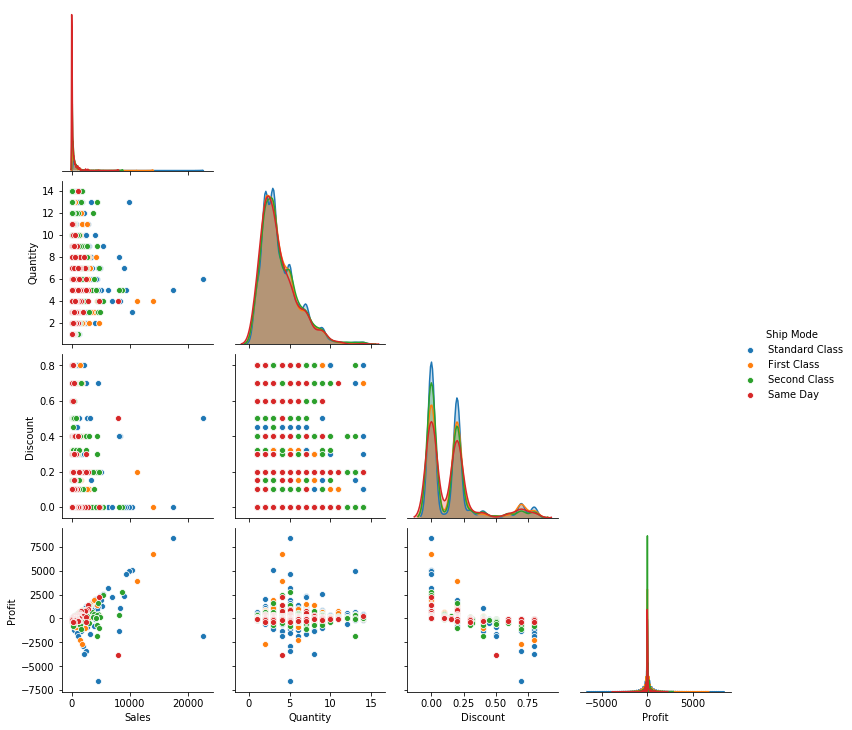

In [110]:
sns.pairplot(store_df, hue = 'Ship Mode', corner=True)

#### Segment

In [54]:
store_df['Segment'].value_counts() 

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

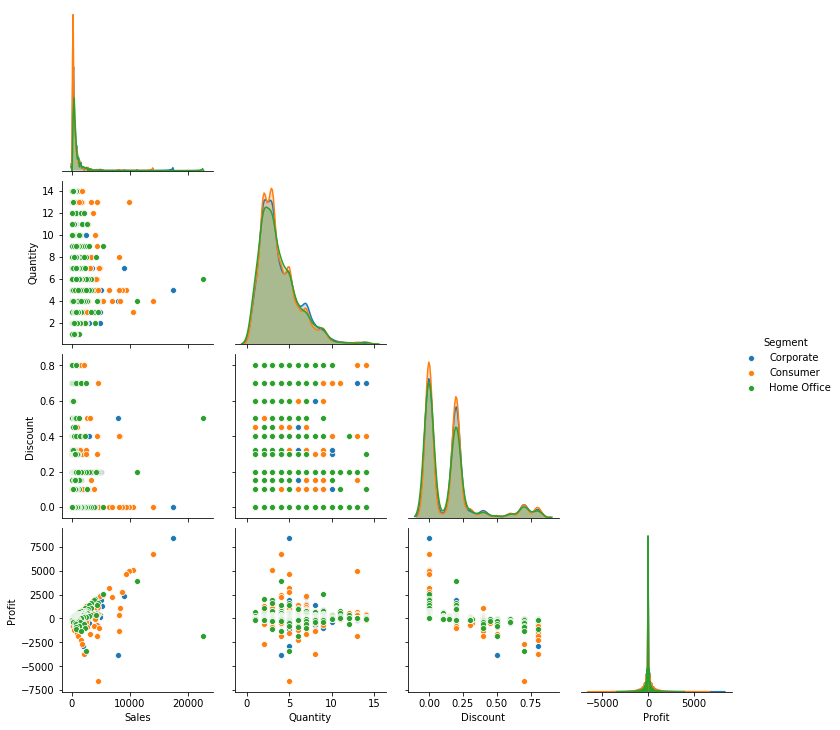

In [109]:
sns.pairplot(store_df, hue = 'Segment', corner=True)

####  Category

In [112]:
store_df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

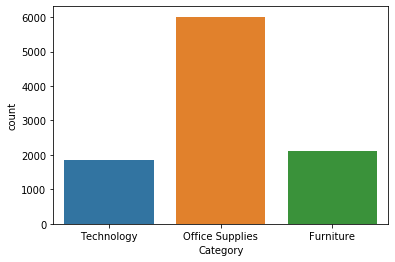

In [111]:
sns.countplot(x=store_df['Category'])

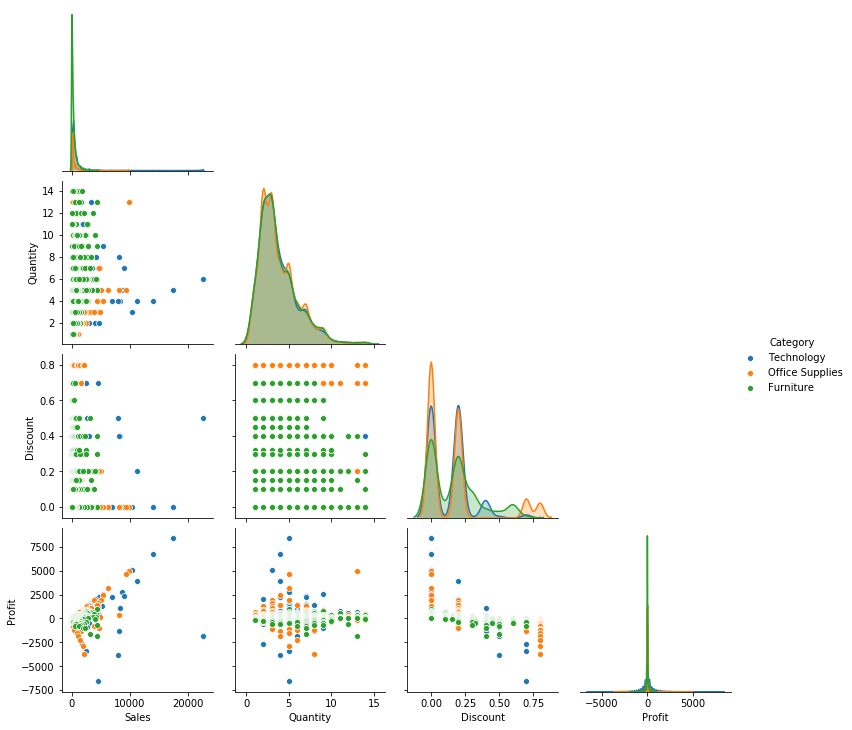

In [108]:
sns.pairplot(store_df,hue='Category',corner=True)

#### Sub Category

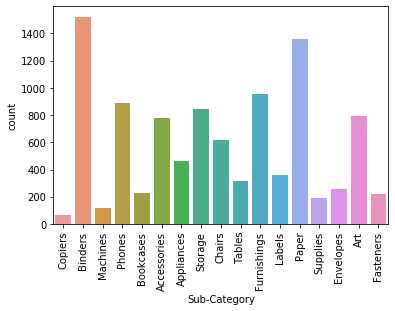

In [106]:
sns.countplot(x=store_df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

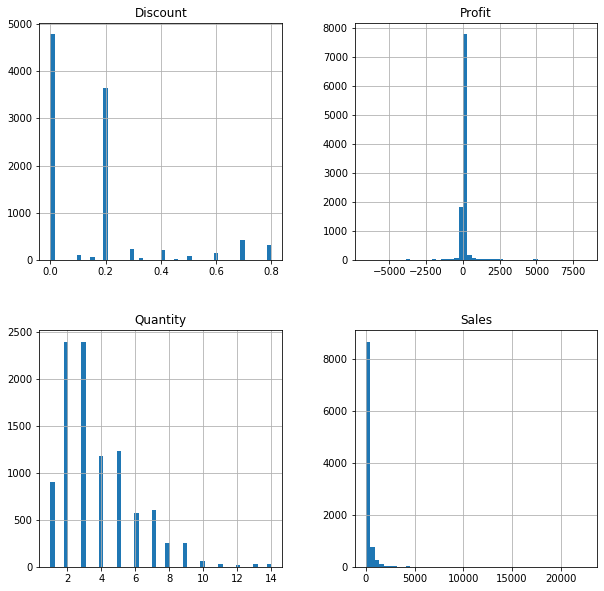

In [62]:
store_df.hist(figsize=(10,10),bins=50)
plt.show()

    # Most customers tends to buy quantity of 2 and 3
    # Discount give maximum is 0 to 20 percent

#### Region

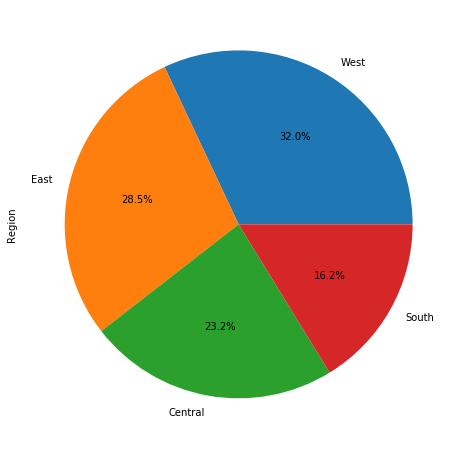

In [105]:
plt.figure(figsize=(10,8))
store_df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

#### Profit Vs Sales

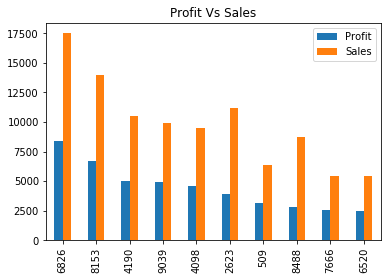

In [83]:
store_df.sort_values("Profit", ascending = False, inplace=True)
store_df[["Profit","Sales"]].head(10).plot.bar(title="Profit Vs Sales")

#### Profit Vs Discount

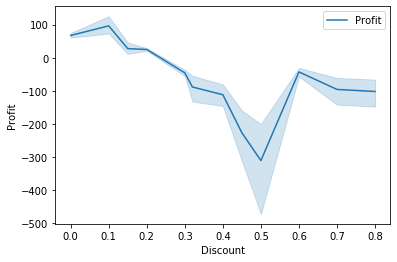

In [101]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=store_df)
plt.legend()
plt.show()

    # No correlation between profit and discount

#### Profit Vs Product Quantity

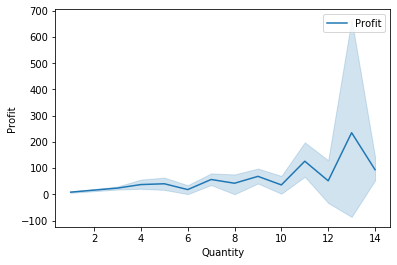

In [99]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=store_df)
plt.legend()
plt.show()

 #### Segment Wise Profit and Sales

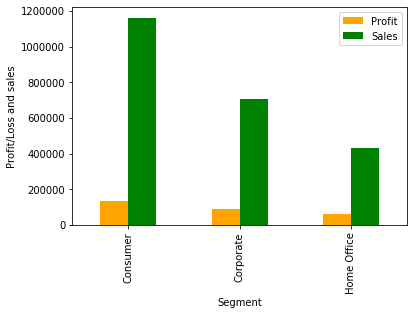

In [115]:
store_df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['orange','green'])
plt.ylabel('Profit/Loss and sales')
plt.show()

    #Profit and sales are maximum in consumer segment and minimum in Home Office segment

#### Segment wise Sales in each Region

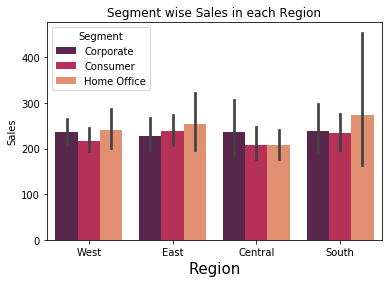

In [95]:
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=store_df,hue='Segment',order=store_df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

     # Segment wise sales are almost same in all regions

#### Region wise Profit and Sales

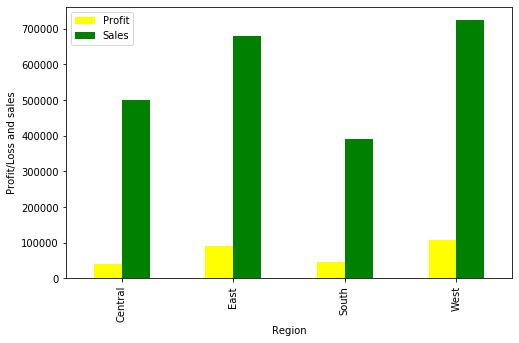

In [92]:
store_df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['yellow','green'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()


       # Maximum sale and profit in west region
       # minimum sale and profit in south region

#### State wise Profit and Sales

In [116]:
states = store_df['State'].value_counts().nlargest(10)
states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

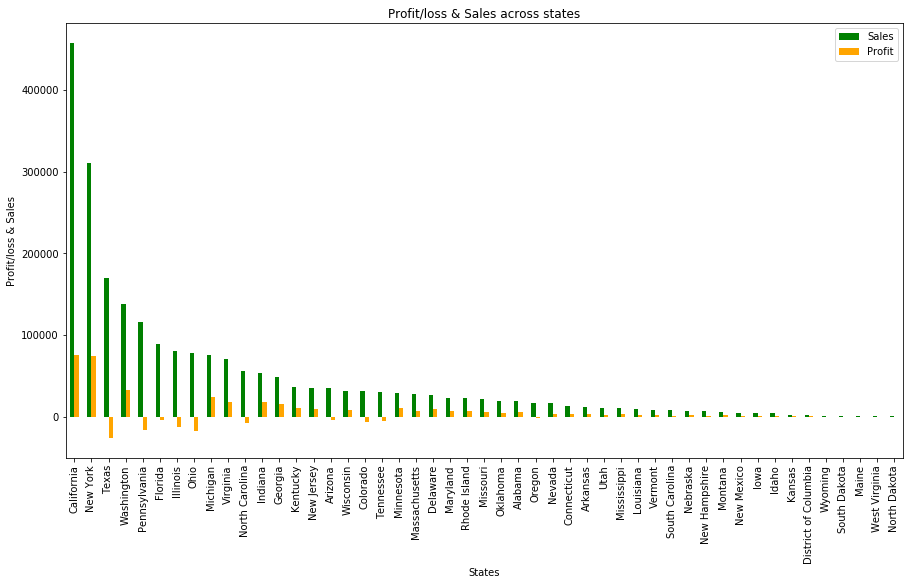

In [88]:
ps = store_df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['green','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()


    # high profit is for california, new york
    # loss is for texas, pennsylvania, Ohio


#### Category wise Profit and Sales

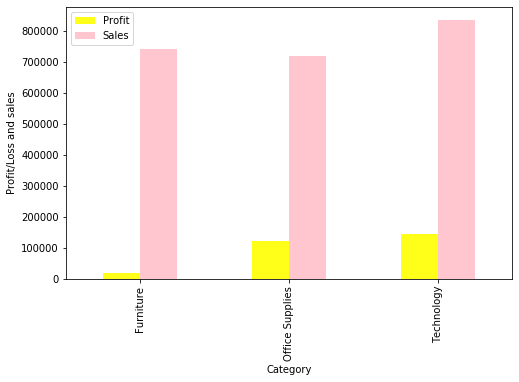

In [86]:
store_df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','pink'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

As a business manager, try to find out the weak areas where you can work to make more profit?

    -Technology and Office Supplies have high profit.
    -Furniture have less profit

#### Sub-Category wise Sales & Profit

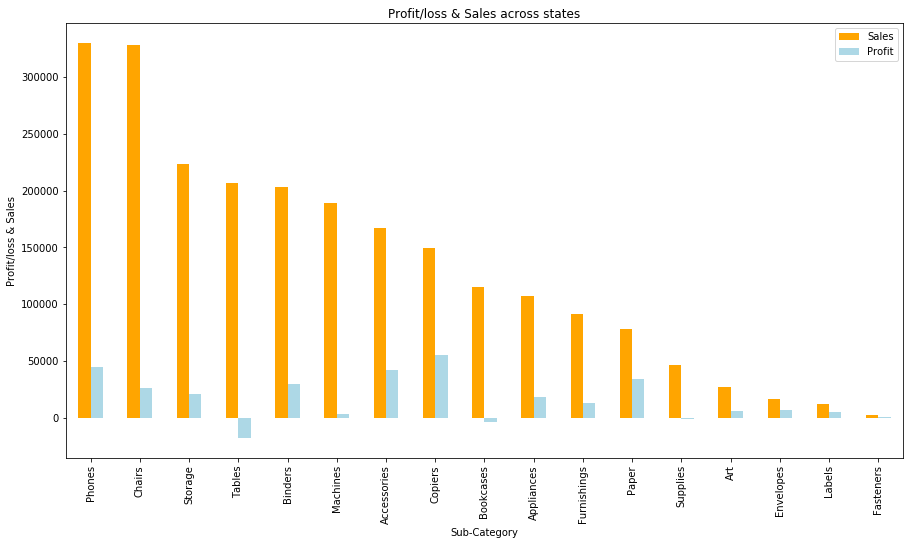

In [84]:
ps = store_df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['orange','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

##### Phones sub-category have high sales.
##### chairs have high sales but less profit compared to phones
##### Tables , Bookcases sub-categories  facing huge loss

# Thankyou